<a href="https://colab.research.google.com/github/komalsuryan/GitWorkshop/blob/master/ARModelTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df1 = pd.read_csv(url)
series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64

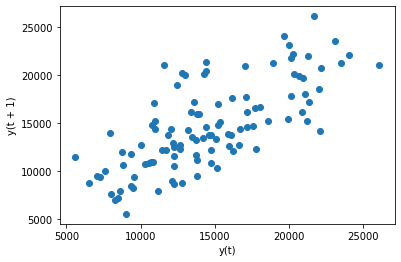

In [4]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv(url, header=0, index_col=0)
lag_plot(series)
pyplot.show()

In [5]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv(url, header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.728068
t+1  0.728068  1.000000


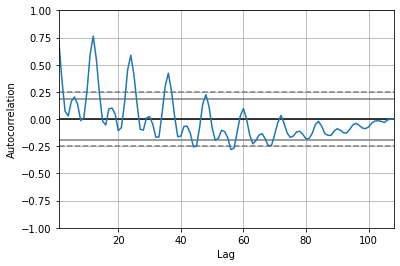

In [6]:

from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv(url, header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

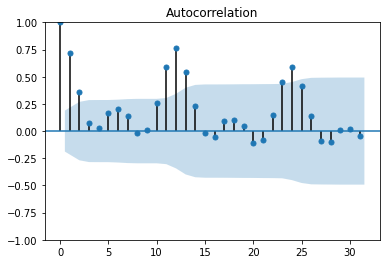

In [7]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv(url, header=0, index_col=0)
plot_acf(series, lags=31)
pyplot.show()

In [8]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [9]:
!pip install statsmodels --upgrade
from statsmodels.tsa.ar_model import AutoReg

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.13.0.dev0+402.g081fc6e85)


In [11]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 2.34568242e+03  6.27826735e-01 -3.51636933e-01  2.94805694e-01
 -1.88797537e-01  1.59444131e-01 -1.94374073e-01  2.75790563e-02
  8.91355403e-02 -1.57804858e-01  8.69822435e-02  1.87848710e-01
  4.10616831e-01 -3.88213886e-01  1.10085154e-01  7.71191767e-02
 -3.13257680e-01  5.13856886e-01 -1.62736864e-01  2.44433342e-01
 -3.92150053e-01  3.74109340e-01 -2.85550733e-01  7.08001412e-02
  2.29414676e-01 -3.76746194e-02  2.86745433e-01 -4.85750369e-01
  3.52602422e-01 -3.14427647e-01]


In [12]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=21789.851299, expected=21084.000000
predicted=11864.655042, expected=18024.000000
predicted=16395.813643, expected=16722.000000
predicted=13593.336784, expected=14385.000000
predicted=17768.393675, expected=21342.000000
predicted=16615.058528, expected=17180.000000
predicted=14998.875156, expected=14577.000000
Test RMSE: 2736.961


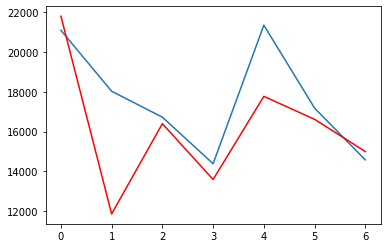

In [13]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()